
<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Logistic Regresion Lab
## Exercise with bank marketing data

_Authors: Sam Stack(DC)_

## Introduction
- Data from the UCI Machine Learning Repository: data, [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal**: Predict whether a customer will purchase a bank product marketed over the phone
- `bank-additional.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [1]:
import pandas as pd
bank = pd.read_csv('./bank.csv')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [2]:
# info on features https://www.kaggle.com/janiobachmann/bank-marketing-dataset

**  Target '`y`' represented as such**
    - No : 0
    - Yes : 1
    


In [3]:
# Perform what ever steps you need to familiarize yourself with the data:

In [4]:
bank.shape

(4119, 21)

In [5]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [6]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


## Step 2: Prepare at least three features
- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

In [7]:
# Check for correlation against y
# From this list choose duration as it is the most correlated of all numeric features to Y
abs(bank.corr()['y']).sort_values(ascending=False)

y                 1.000000
duration          0.418565
nr.employed       0.349241
pdays             0.332012
euribor3m         0.298565
emp.var.rate      0.283216
previous          0.255697
cons.price.idx    0.098326
campaign          0.076091
age               0.060374
cons.conf.idx     0.054393
Name: y, dtype: float64

In [8]:
# y indicates a consumer successfully signing up to make a term deposit in direct response to the marketing program
# Select housing and marital as the other two features to test 
# Assumes consumers with home loans are more likely to be savers
# Assumes the ype of job a person does is correlated to income and this in turn effects this persons ability to save

In [9]:
# Check for the quantity of unknown values for housing column
bank.housing.value_counts()

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64

In [10]:
# check the baseline accuracy for the feature jobs for those rows that have the value 'Unknown'
print(bank[bank.housing == 'unknown'].y.mean())
# Compare this to the baseline accuracy of those that are not 
print(bank[bank.housing != 'unknown'].y.mean())
# The unknowns for housing makes up such a small % of total (less that 3% of total)
print(len(bank[bank.housing == 'unknown']) / len(bank))
# Therefore I am going to eliminate these rows from further analysis 

0.08571428571428572
0.11011459890383657
0.025491624180626365


In [11]:
# check the baseline accuracy for the feature jobs for those rows that have the value 'Unknown' 
print(bank[bank.job == 'unknown'].y.mean())
# Compare this to the baseline accuracy of those that are not 
print(bank[bank.job != 'unknown'].y.mean())
# The unknowns for job makes up less a 1/10th of a percent of total rows
print(len(bank[bank.job == 'unknown']) / len(bank))
# Therefore I am going to eliminate these rows from further analysis 

0.10256410256410256
0.10955882352941176
0.009468317552804079


In [12]:
# rows for housing and job that have the value 'unknown' eliminated from the dataframe
bank_no_h_uk = bank[bank.housing != 'unknown']
bank_no_h_j_uk = bank_no_h_uk[bank_no_h_uk.job != 'unknown']
bank_no_h_j_uk[bank_no_h_j_uk.housing == 'unknown']
bank_no_h_j_uk[bank_no_h_j_uk.job == 'unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [13]:
# Covert housing 'yes' and 'no' values into 1s and 0s
bank_no_h_j_uk['housing_num'] = bank_no_h_j_uk.housing.map({'yes':1, 'no':0})

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



## Step 3: Model building
- Use cross-validation to evaluate the logistic regression model with your chosen features.  
    You can use any (combination) of the following metrics to evaluate.
    - [Classification/Accuracy Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
    - [Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    - [ROC curves and area under a curve (AUC)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
    - [Log loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)
- Try to increase the metrics by selecting different sets of features
    - *Bonus*: Experiment with hyper parameters such are regularization.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Build a Model**  

In [15]:
# convert selected features do dummies

# set the model

# set x and y

# train test splot

# fit model

In [16]:
# Create dummy variables using `get_dummies` from Pandas.
job_dummies = pd.get_dummies(bank_no_h_j_uk.job, prefix='job')
# Drop first column 
job_dummies.drop(job_dummies.columns[0], axis=1, inplace=True)
# Concatenate the job dummies with the latest version of the dataframe and rename 
bank_no_h_j_uk_dummies = pd.concat([bank_no_h_j_uk, job_dummies], axis=1)
# Check the head 
bank_no_h_j_uk_dummies.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,1,0,0,0,0,0,0,0,0,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,0,0,0,0,0,0,1,0,0,0


In [17]:
# set the model (using logistical Regression)
LR = LogisticRegression()

In [18]:
# To set X
# Extract column names
columns_df = bank_no_h_j_uk_dummies.columns
columns_df

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'housing_num',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed'],
      dtype='object')

In [19]:
# Select the features that I want for model
feature_cols = ['duration', 'housing_num',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed']
feature_cols

['duration',
 'housing_num',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed']

In [20]:
# Set feature matrix and response
X = bank_no_h_j_uk_dummies[feature_cols]
y = bank_no_h_j_uk_dummies.y

In [21]:
# Set train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [22]:
# Set the model with the training data
LR.fit(X_train, y_train)

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Get the Coefficient for each feature.**
- Be sure to make note of interesting findings.



In [23]:
# Extract the coefficients
LR.coef_
# convert numpy array to a list
LR.coef_.tolist()
# Get rid of the additional brackets
[num for elem in LR.coef_.tolist() for num in elem]
# put the feature names and coefficients into a dictionary
dict(zip(feature_cols,[num for elem in LR.coef_.tolist() for num in elem]))


{'duration': 0.0039449714602377214,
 'housing_num': 0.11880725845548135,
 'job_blue-collar': -0.8190533862671558,
 'job_entrepreneur': -0.9814983645840256,
 'job_housemaid': -0.21525733410769995,
 'job_management': -0.3752632116230169,
 'job_retired': 0.4181830880620825,
 'job_self-employed': -0.5187879022137063,
 'job_services': -0.36099415495192744,
 'job_student': 0.8137803730957259,
 'job_technician': -0.19601167455270377,
 'job_unemployed': 0.658507503809957}

**Use the Model to predict on x_test and evaluate the model using metric(s) of Choice.**

In [24]:
# Get the score
y_pred = LR.predict(X_test)
LR.score(X_test, y_test)

0.8933601609657947

In [25]:
# compare to baseline accuracy 
1 - bank_no_h_j_uk_dummies.y.mean()

0.889811320754717

In [26]:
# prediction is lower than baseline accuracy

### Model 2: Use a different combination of features.
- Evaluate the model and interpret your choosen metrics.

In [27]:
# set the model (using logistical Regression)
logreg = LogisticRegression()

In [28]:
# Select the features I want for model
# I am only using job for this one
feature_cols = [
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed']
feature_cols

['job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed']

In [29]:
# Set feature matrix and response
X = bank_no_h_j_uk_dummies[feature_cols]
y = bank_no_h_j_uk_dummies.y

In [30]:
# Set train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
logreg.fit(X_train, y_train)

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
# Extract the coefficients
logreg.coef_
# convert numpy array to a list
logreg.coef_.tolist()
# Get rid of the additional brackets
[num for elem in logreg.coef_.tolist() for num in elem]
# put the feature names and coefficients into a dictionary
dict(zip(feature_cols,[num for elem in logreg.coef_.tolist() for num in elem]))


{'job_blue-collar': -0.7429386767666868,
 'job_entrepreneur': -0.9545961164054455,
 'job_housemaid': -0.5022393139807977,
 'job_management': -0.41887283737172953,
 'job_retired': 0.638261696165025,
 'job_self-employed': -0.5617295390324037,
 'job_services': -0.38260498125255504,
 'job_student': 0.7480317899015959,
 'job_technician': -0.2396230630685535,
 'job_unemployed': 0.3984459564669041}

In [33]:
# I am not sure how to interpret these coefficients. 
# The spread on these appear to show a high degree of variability. 

In [34]:
# Get the score
# Score is slightly lower than prior score
y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)

0.886317907444668

In [35]:
# eliminating the housing and diminishes the accuracy of the test



### Is your model not performing very well?

Is it not predicting any True Positives?

Lets try one more thing before we revert to grabbing more features.  Adjusting the probability threshold.

Use the `LogisticRegression.predict_proba()` attribute to get the probabilities.

Recall from the lesson the first probability is the for `class 0` and the second is for `class 1`.

In [36]:
# is it generating any True Positives

In [37]:
# Get probability predictions.
logreg_pred_proba = logreg.predict_proba(X_test)[:,1]
logreg_pred_proba
#list(zip(admissions.gre,logit_pred_proba))

array([0.24625513, 0.06851954, 0.13392198, 0.0923234 , 0.10848206,
       0.13392198, 0.08557072, 0.0923234 , 0.06851954, 0.13392198,
       0.06851954, 0.13392198, 0.13392198, 0.10848206, 0.05618323,
       0.13392198, 0.22645179, 0.10848206, 0.06851954, 0.06851954,
       0.05618323, 0.10848206, 0.08557072, 0.0923234 , 0.10848206,
       0.08102902, 0.10848206, 0.10848206, 0.22645179, 0.13392198,
       0.24625513, 0.0923234 , 0.09540791, 0.08557072, 0.06851954,
       0.09540791, 0.09540791, 0.13392198, 0.06851954, 0.06851954,
       0.05618323, 0.06851954, 0.18720545, 0.09540791, 0.10848206,
       0.24625513, 0.10848206, 0.18720545, 0.22645179, 0.10848206,
       0.08102902, 0.09540791, 0.13392198, 0.08102902, 0.08557072,
       0.09540791, 0.06851954, 0.18720545, 0.13392198, 0.13392198,
       0.13392198, 0.09540791, 0.13392198, 0.10848206, 0.05618323,
       0.06851954, 0.13392198, 0.09540791, 0.06851954, 0.22645179,
       0.10848206, 0.13392198, 0.06851954, 0.22645179, 0.06851

In [38]:
metrics.confusion_matrix(y_true=y_test, y_pred=logreg_pred_proba > .5)
#X_test.shape

array([[881,   0],
       [113,   0]])

In [39]:
# For predicted probability greater than .5
y_true = y_test
y_pred = logreg_pred_proba > .5
pd.crosstab(y_true, y_pred, margins=True,
           rownames=['true'], colnames=['pred'])

pred,False,All
true,,
0,881,881
1,113,113
All,994,994


In [40]:
# Answer here: 885 true negatives, 0 false positives, 109 false negatives, 0 true positives
# Accuracy = (885 + 0) / 994 = .8903
# But as no true positives are predicted, this model is not useful

In [41]:
logreg.predict_proba(X_test)

array([[0.75374487, 0.24625513],
       [0.93148046, 0.06851954],
       [0.86607802, 0.13392198],
       ...,
       [0.86607802, 0.13392198],
       [0.86607802, 0.13392198],
       [0.89151794, 0.10848206]])

**Visualize the distribution**

In [42]:
bank_no_h_j_uk_dummies['y_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [43]:
bank_no_h_j_uk_dummies.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,y_pred_prob
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,0,0,0,0,0,0,0,0,0,0.06852


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5);

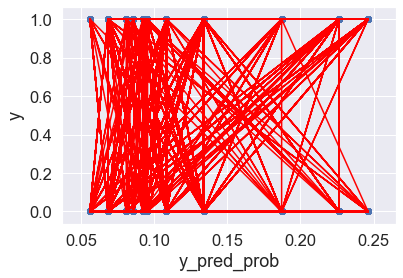

In [45]:
plt.scatter(bank_no_h_j_uk_dummies.y_pred_prob, bank_no_h_j_uk_dummies.y);
plt.plot(bank_no_h_j_uk_dummies.y_pred_prob, bank_no_h_j_uk_dummies.y, color='red');
plt.xlabel('y_pred_prob');
plt.ylabel('y');

In [46]:
# The visualization shows that most predictions are for y = 0 
# This is what we would expect
# The pred prob values reflect this too

** Calculate a new threshold and use it to convert predicted probabilities to output classes**



In [47]:
# For predicted probability greater than .3
y_true = y_test
y_pred = logreg_pred_proba > .3
pd.crosstab(y_true, y_pred, margins=True,
           rownames=['true'], colnames=['pred'])

pred,False,All
true,,
0,881,881
1,113,113
All,994,994


**Evaluate the model metrics now**

In [48]:
print((857 + 93) / 994 )
print(23 / 96)
print(41 / 898)

0.9557344064386318
0.23958333333333334
0.045657015590200446


In [49]:
# Answer here: 857 true negatives, 41 false positives, 73 false negatives, 93 true positives
# Accuracy = (857 + 93) / 994 = .9557
# TPR = 23 / 96 = .23958
# FPR = 41 / 898 = .045657

## Step 4: Build a model using all of the features.

- Evaluate it using your prefered metrics.

In [50]:
bank_no_unk = bank[(bank != 'unknown').all(1)]
1 - len(bank_no_unk)/len(bank)
# dropping 25% of the data

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0.24981791697013833

In [51]:
bank_no_unk.y.mean() / bank.y.mean()
# shows that streamlined data set is 9% more likely to have y = 1

1.093599982778292

In [52]:
# Create dummies for features that are objects greater than two unique elements
# Create dummy variables using `get_dummies` from Pandas for month.
day_of_week_dummies = pd.get_dummies(bank_no_unk.day_of_week, prefix='day_of_week')
# Drop first column 
day_of_week_dummies.drop(day_of_week_dummies.columns[0], axis=1, inplace=True)
# Create dummy variables using `get_dummies` from Pandas for month.
month_dummies = pd.get_dummies(bank_no_unk.month, prefix='month')
# Drop first column 
month_dummies.drop(month_dummies.columns[0], axis=1, inplace=True)
# Create dummy variables using `get_dummies` from Pandas for education.
education_dummies = pd.get_dummies(bank_no_unk.education, prefix='education')
# Drop first column 
# Create dummy variables using `get_dummies` from Pandas for marital.
marital_dummies = pd.get_dummies(bank_no_unk.marital, prefix='marital')
# Drop first column education_dummies.drop(education_dummies.columns[0], axis=1, inplace=True)
# Create dummy variables using `get_dummies` from Pandas for job.
job_dummies = pd.get_dummies(bank_no_unk.job, prefix='job')
# Drop first column 
job_dummies.drop(job_dummies.columns[0], axis=1, inplace=True)
# Create dummy variables using `get_dummies` from Pandas for poutcome.
poutcome_dummies = pd.get_dummies(bank_no_unk.poutcome, prefix='poutcome')
# Drop first column 
poutcome_dummies.drop(poutcome_dummies.columns[0], axis=1, inplace=True)


# Concatenate the job dummies with the latest version of the dataframe and rename 
bank_no_unk_dummies = pd.concat([bank_no_unk, job_dummies, marital_dummies, education_dummies,month_dummies, day_of_week_dummies, poutcome_dummies], axis=1)
# Check the head 
bank_no_unk_dummies.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,1,0,0,0,0,0,0,0,1,0


In [53]:
# Covert default 'yes' and 'no' values into 1s and 0s
bank_no_unk_dummies['default_num'] = bank_no_unk_dummies.default.map({'yes':1, 'no':0})
# Covert housing 'yes' and 'no' values into 1s and 0s
bank_no_unk_dummies['housing_num'] = bank_no_unk_dummies.housing.map({'yes':1, 'no':0})
# Covert loan 'yes' and 'no' values into 1s and 0s
bank_no_unk_dummies['loan_num'] = bank_no_unk_dummies.loan.map({'yes':1, 'no':0})
# Covert contact 'yes' and 'no' values into 1s and 0s
bank_no_unk_dummies['contact_num'] = bank_no_unk_dummies.contact.map({'cellular':1, 'telephone':0})
bank_no_unk_dummies

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,default_num,housing_num,loan_num,contact_num
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,0,0,0,0,1,0,0,1,0,1
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,0,0,0,0,1,0,0,0,0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,0,0,0,1,1,0,0,1,0,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,0,0,0,1,0,0,1,0,1
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,0,1,0,0,1,0,0,1,1,1
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,0,0,0,0,1,0,0,1,0,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,1,0,0,0,0,0,0,0,0,1
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,0,0,0,0,1,0,0,0,0,1


In [54]:
bank_no_unk_dummies.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success', 'default

In [55]:
feature_cols = ['duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success', 'default_num',
       'housing_num', 'loan_num', 'contact_num']

In [56]:
# set the model (using logistical Regression)
logregall = LogisticRegression()


# Set feature matrix and response
X = bank_no_unk_dummies[feature_cols]
y = bank_no_unk_dummies.y

# Set train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Set the model with the training data
logregall.fit(X_train, y_train)

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
# Get the score
y_pred = logregall.predict(X_test)
logregall.score(X_test, y_test)

0.9236739974126779

In [58]:
# Store the predicted probabilities of class 1.
bank_no_unk_dummies['y_all_pred_prob'] = logregall.predict_proba(X)[:, 1]
bank_no_unk_dummies

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,default_num,housing_num,loan_num,contact_num,y_all_pred_prob
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,0,0,0,1,0,0,1,0,1,0.178448
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,0,0,0,1,0,0,0,0,0,0.021138
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,0,0,1,1,0,0,1,0,0,0.027177
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,0,0,0,1,0,0,1,0,1,0.019363
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,1,0,0,0,0,0,0,0,1,0.199704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,0,0,1,0,0,1,1,1,0.011889
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,0,0,0,1,0,0,1,0,0,0.018315
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,0,0,0,0,0,0,0,0,1,0.031277
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,0,0,0,1,0,0,0,0,1,0.102997


In [59]:
# Get probability predictions.
logregall_pred_proba = logregall.predict_proba(X_test)[:,1]
logregall_pred_proba
#list(zip(admissions.gre,logit_pred_proba))

array([7.79625686e-01, 8.30800753e-01, 4.46150231e-03, 1.60013447e-02,
       2.34760301e-02, 1.02182467e-01, 1.90690400e-02, 4.76362820e-02,
       2.29648667e-01, 1.21387510e-02, 6.38409690e-02, 1.05255369e-01,
       9.50059667e-01, 1.49796601e-02, 4.69683671e-03, 8.34164751e-03,
       1.18907942e-01, 1.52321605e-02, 2.05204309e-02, 1.48608864e-02,
       1.05248819e-02, 2.25937069e-02, 5.81546035e-02, 3.32061519e-01,
       1.33457882e-02, 2.45785506e-03, 3.36535775e-02, 1.74890134e-02,
       7.80839167e-02, 2.68811985e-02, 1.94058594e-01, 1.84944398e-02,
       1.34000674e-02, 6.45292769e-03, 4.83452299e-01, 4.55490238e-02,
       4.23799353e-01, 4.03046139e-01, 5.34983257e-02, 5.69109300e-02,
       7.04442411e-01, 3.85175339e-02, 7.69931973e-01, 8.28055586e-02,
       1.35143861e-02, 9.02056919e-01, 1.09529266e-02, 2.49350311e-02,
       1.91402501e-01, 1.27981019e-02, 4.10502004e-02, 5.80081618e-02,
       1.95855913e-02, 3.31355525e-01, 2.26766039e-02, 3.03257267e-03,
      

In [60]:
logregall.predict_proba(X_test)

array([[0.22037431, 0.77962569],
       [0.16919925, 0.83080075],
       [0.9955385 , 0.0044615 ],
       ...,
       [0.26754689, 0.73245311],
       [0.97541054, 0.02458946],
       [0.93540542, 0.06459458]])

In [61]:
metrics.confusion_matrix(y_true=y_test, y_pred=logregall_pred_proba > .5)
#X_test.shape# For predicted probability greater than .5
y_true = y_test
y_pred = logregall_pred_proba > .5
pd.crosstab(y_true, y_pred, margins=True,
           rownames=['true'], colnames=['pred'])

pred,False,True,All
true,,,
0,666,15,681
1,44,48,92
All,710,63,773


In [62]:
# Answer here: 666 true negatives, 15 false positives, 44 false negatives, 48 true positives
# Accuracy = (666 + 48) / 773 = .92367
# TPR = 48 / 92 = .5217
# FPR = 15 / 681 = 0.22026

## Bonus: Use Regularization to optimize your model.

In [ ]:
# try using a for loop to test various regularization strengths 'C'